The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested _in!_

In [192]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [193]:
df =pd.read_csv("data/nobel.csv")

In [194]:
top_gender=df["sex"].value_counts().idxmax()

In [195]:
top_country=df["birth_country"].value_counts().idxmax()

In [196]:
df['is_usa'] = df['birth_country'] == 'United States of America'

In [197]:
df['decade'] = (df['year'] // 10) * 10

In [198]:
decade_totals = df.groupby('decade').size()

In [199]:
decade_usa_totals= df.groupby('decade')["is_usa"].sum()

In [200]:
decade_ratios=decade_usa_totals/decade_totals

In [201]:
max_decade_usa = decade_ratios.idxmax()

<AxesSubplot: xlabel='decade'>

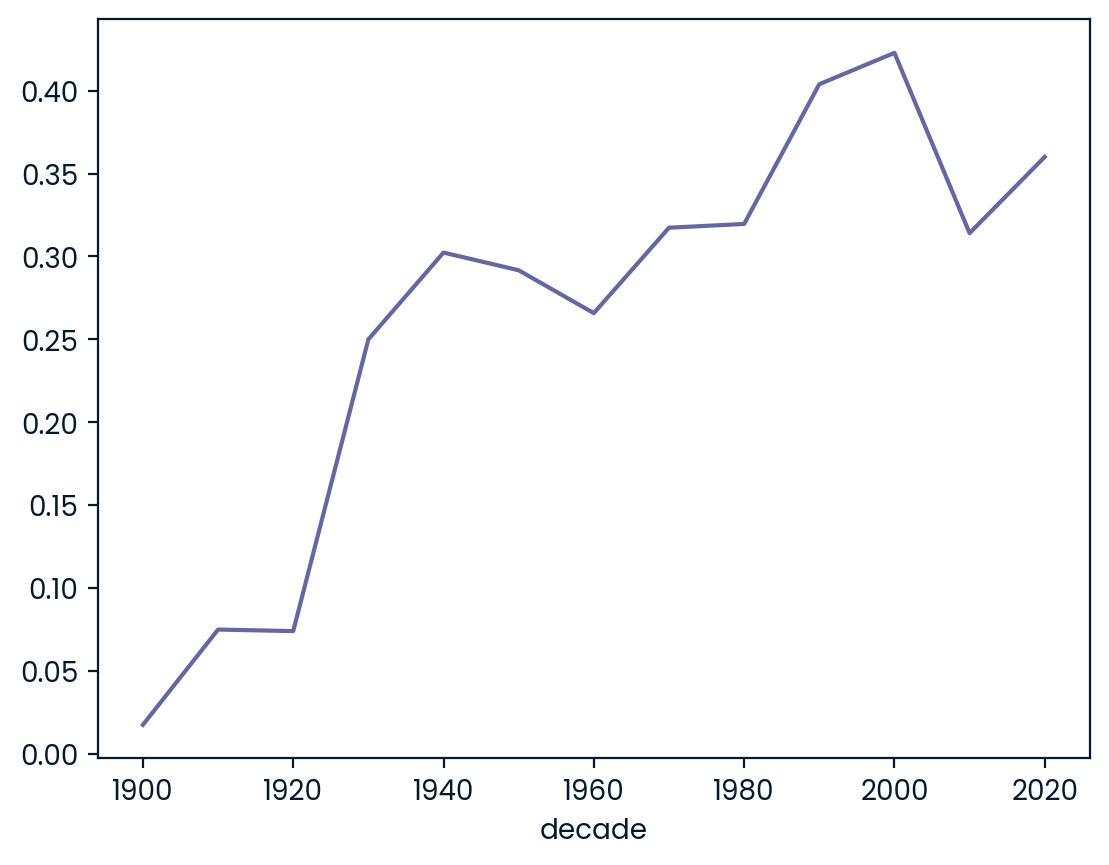

In [202]:
sns.lineplot(x=decade_ratios.index, y=decade_ratios.values)

In [203]:
df['is_female'] = df['sex'] == 'Female'

In [204]:
category_decade_totals  = df.groupby(['category','decade']).size()

In [205]:
category_decade_female_totals = df.groupby(['category','decade'])['is_female'].sum()

In [206]:
category_decade_female_ratios = category_decade_female_totals / category_decade_totals

In [207]:
max_female_idx = category_decade_female_ratios.idxmax()

In [208]:
max_female_dict = {max_female_idx[1]: max_female_idx[0]}

In [209]:
female_ratios_series = category_decade_female_ratios.reset_index(name='female_ratio')

<AxesSubplot: xlabel='decade', ylabel='female_ratio'>

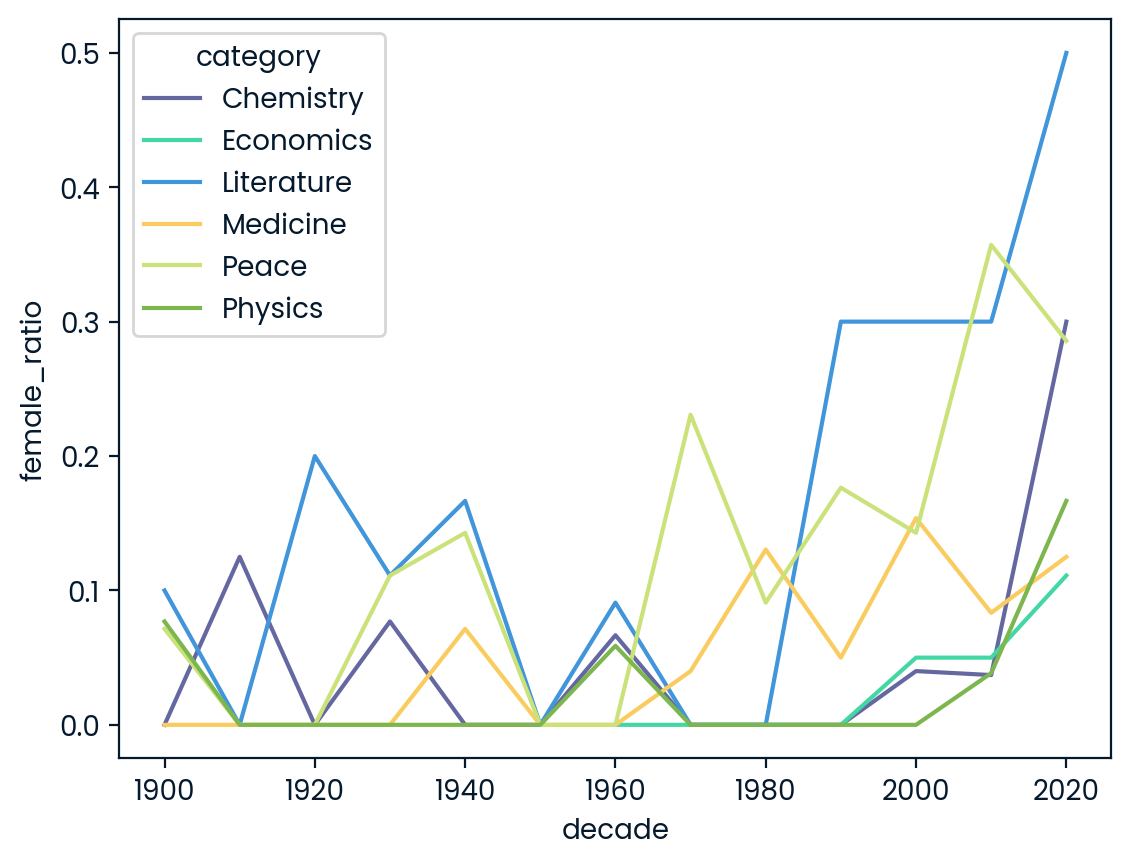

In [210]:
sns.lineplot(data=female_ratios_series, x='decade', y='female_ratio', hue='category')

In [211]:
female_winners = df[df['sex'] == 'Female']

In [212]:
first_female_winner = female_winners.loc[female_winners['year'].idxmin()]

In [213]:
first_woman_name = first_female_winner['full_name']
first_woman_category = first_female_winner['category']

In [214]:
winner_counts = df['full_name'].value_counts()

In [215]:
repeat_winners = winner_counts[winner_counts > 1]

In [216]:
repeat_list = repeat_winners.index.tolist()